In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
data = pd.read_csv('covid_worldwide.csv')


In [50]:
#viewing the first 5 data rows
data.head()


,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [51]:
#viewing the last 5 data rows
data.tail()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN
230,231,Tokelau,5,NaN,NaN,5,NaN,"1,378"


In [52]:
#shape of the data
data.shape #rows and column

(231, 8)

In [53]:
#describing the data
data.describe()

,Serial Number
count,231.000000
mean,116.000000
std,66.828138
min,1.000000
25%,58.500000
50%,116.000000
75%,173.500000
max,231.000000


In [54]:
#checking for any null values
data.isna().sum()

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [55]:
#dropping any null values
data.dropna(how='any',inplace=True)

In [56]:
data.head()


,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [57]:
#shape of data after dropping the null value rows
data.shape

(195, 8)

In [58]:
#columns present in the data set
data.columns

Index(['Serial Number', 'Country', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population'],
      dtype='object')

In [59]:
#converting the string into float
data['Total Cases']=data['Total Cases'].str.replace(',', '', regex=True).astype("float")
data['Total Deaths']=data['Total Deaths'].str.replace(',', '', regex=True).astype("float")
data['Total Recovered']=data['Total Recovered'].str.replace(',', '', regex=True).astype("float")
data['Active Cases']=data['Active Cases'].str.replace(',', '', regex=True).astype("float")
data['Total Test']=data['Total Test'].str.replace(',', '', regex=True).astype("float")
data['Population']=data['Population'].str.replace(',', '', regex=True).astype("float")

In [60]:
#checking for null values
data.isna().sum()

Serial Number      0
Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64

In [61]:
#country analysis
#country with most cases
most_cases= data[['Country','Total Cases']].sort_values(by="Total Cases",ascending=False).head(10)
most_cases.head(10)

,Country,Total Cases
0,USA,104196861.0
1,India,44682784.0
2,France,39524311.0
3,Germany,37779833.0
4,Brazil,36824580.0
5,Japan,32588442.0
6,S. Korea,30197066.0
7,Italy,25453789.0
8,UK,24274361.0
9,Russia,21958696.0


Text(0.5, 1.0, 'Top 10 countries with most number of cases')

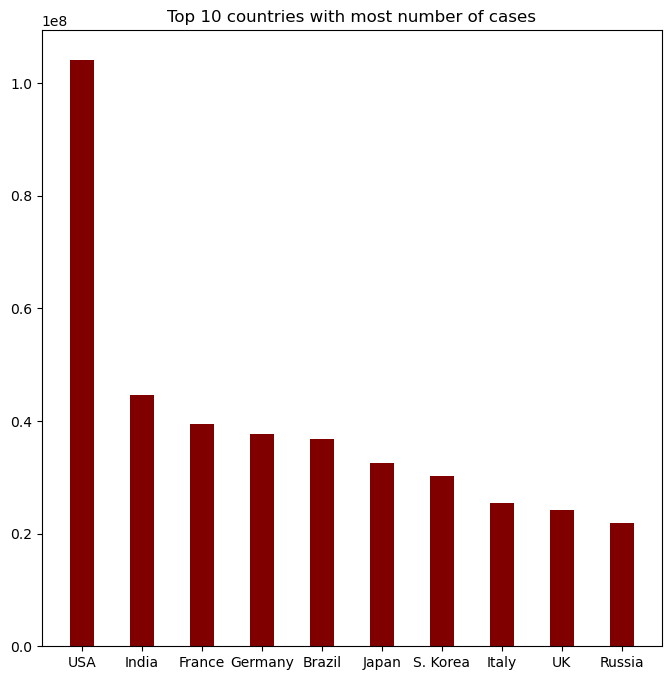

In [66]:
#plotting the bar graph
plt.figure(figsize=(8,8))
plt.bar(most_cases['Country'],most_cases['Total Cases'],width=0.4,color='Maroon')
#plt.ylabel("Countries")
#plt.xlabel("No of cases")
plt.title("Top 10 countries with most number of cases")

In [67]:
#countries with most active casses
most_active_cases=data[['Country','Active Cases']].sort_values(by='Active Cases',ascending=False).head(10)
most_active_cases

,Country,Active Cases
5,Japan,10952618.0
0,USA,1741147.0
20,Poland,925549.0
12,Vietnam,870843.0
18,Mexico,429421.0
15,Taiwan,423489.0
6,S. Korea,422703.0
40,Hong Kong,354439.0
64,Costa Rica,316307.0
7,Italy,251970.0


([<matplotlib.patches.Wedge at 0x26c989d0d90>,
 [Text(-0.8191735567264029, 0.7341353308213785, 'Japan'),
  Text(0.09677079988871072, -1.0957351013310193, 'USA'),
  Text(0.6120798200781964, -0.9139793727721884, 'Poland'),
  Text(0.8806361299996935, -0.6591509740106306, 'Vietnam'),
  Text(1.0141227500037049, -0.42609276915352967, 'Mexico'),
  Text(1.0691987850073275, -0.2584839610862826, 'Taiwan'),
  Text(1.0966633192377935, -0.08561287425583697, 'S. Korea'),
  Text(1.0974287261964923, 0.07516775185373313, 'Hong Kong'),
  Text(1.0792259167946685, 0.21277081688687413, 'Costa Rica'),
  Text(1.0503380273178262, 0.32678743606524613, 'Italy')],
 [Text(-0.4468219400325834, 0.40043745317529733, '65.63%'),
  Text(0.052784072666569475, -0.5976736916351014, '10.43%'),
  Text(0.3338617200426526, -0.49853420333028453, '5.55%'),
  Text(0.4803469799998328, -0.3595368949148894, '5.22%'),
  Text(0.5531578636383845, -0.23241423772010705, '2.57%'),
  Text(0.583199337276724, -0.14099125150160866, '2.54%'),

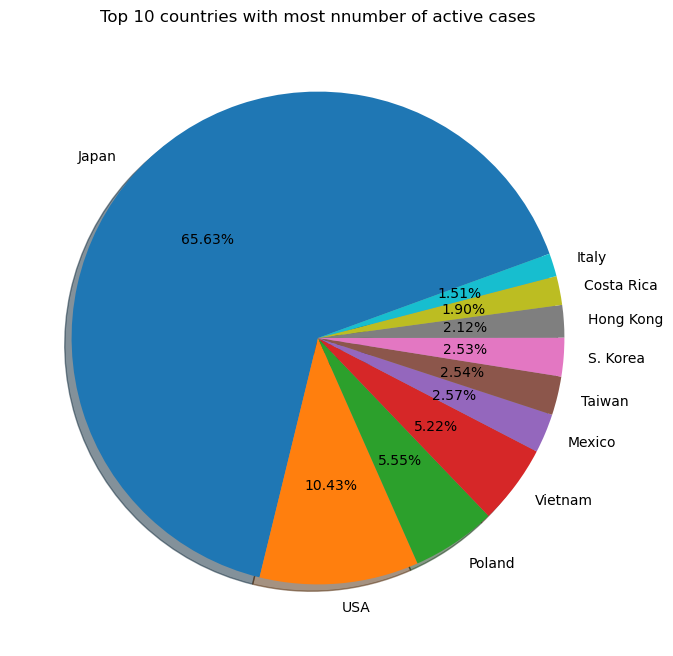

In [68]:
plt.figure(figsize=(8,8))
plt.title("Top 10 countries with most nnumber of active cases")
plt.pie(most_active_cases['Active Cases'],labels=most_active_cases['Country'],autopct='%0.2f%%',shadow=True,startangle=20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

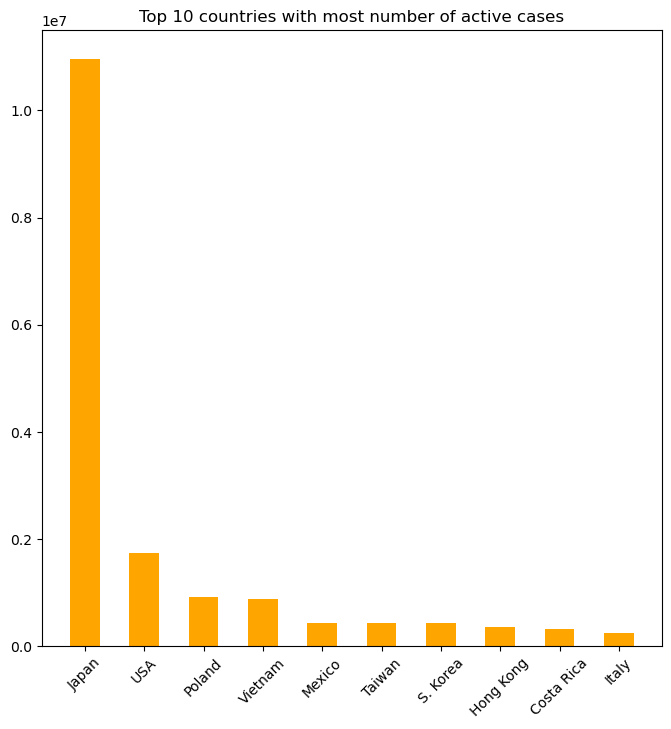

In [69]:
plt.figure(figsize=(8,8))
plt.bar(most_active_cases['Country'],most_active_cases['Active Cases'],color='orange',width=0.5)
plt.title("Top 10 countries with most number of active cases")
plt.xticks(rotation=45)


In [72]:
#countries with Most death  and Less death
most_deaths=data[['Country','Total Deaths']].sort_values(by='Total Deaths',ascending=False).head(10)
most_deaths.head(10)


,Country,Total Deaths
0,USA,1132935.0
4,Brazil,697074.0
1,India,530740.0
9,Russia,395108.0
18,Mexico,332198.0
34,Peru,218931.0
8,UK,204171.0
7,Italy,186833.0
3,Germany,165711.0
2,France,164233.0


In [73]:
least_deaths=data[['Country','Total Deaths']].sort_values(by='Total Deaths',ascending=True).head(10)
least_deaths.head(10)

,Country,Total Deaths
216,Nauru,1.0
209,Cook Islands,2.0
219,Saint Pierre Miquelon,2.0
220,Wallis and Futuna,7.0
224,Montserrat,8.0
213,Palau,9.0
217,Anguilla,12.0
185,Tonga,13.0
194,Vanuatu,14.0
147,Bhutan,21.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

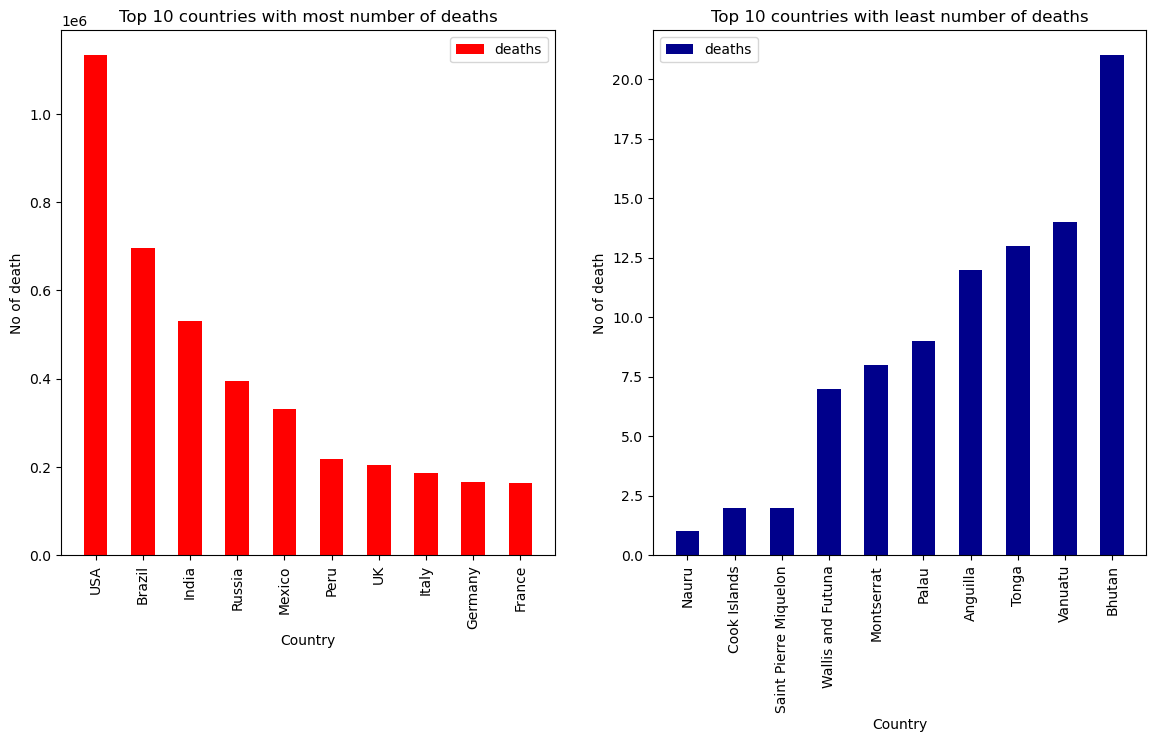

In [74]:
plt.figure(figsize=(14,15))
plt.subplot(2,2,1)
plt.bar(most_deaths['Country'],most_deaths['Total Deaths'],color='red',label='deaths',width=0.5)
plt.legend()
plt.xlabel("Country")
plt.ylabel("No of death")
plt.title("Top 10 countries with most number of deaths")
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.bar(least_deaths['Country'],least_deaths['Total Deaths'],color='darkblue',label='deaths',width=0.5)
plt.legend()
plt.xlabel("Country")
plt.ylabel("No of death")
plt.title("Top 10 countries with least number of deaths")
plt.xticks(rotation=90)

In [75]:
#countries wit most recoveries
most_recoveries=data[['Country','Total Recovered']].sort_values(by='Total Recovered',ascending=False).head(10)
most_recoveries.head(10)

,Country,Total Recovered
0,USA,101322779.0
1,India,44150289.0
2,France,39264546.0
3,Germany,37398100.0
4,Brazil,35919372.0
6,S. Korea,29740877.0
7,Italy,25014986.0
8,UK,24020088.0
5,Japan,21567425.0
9,Russia,21356008.0


Text(0.5, 1.0, 'Top 10 countries with most number of Recoveries')

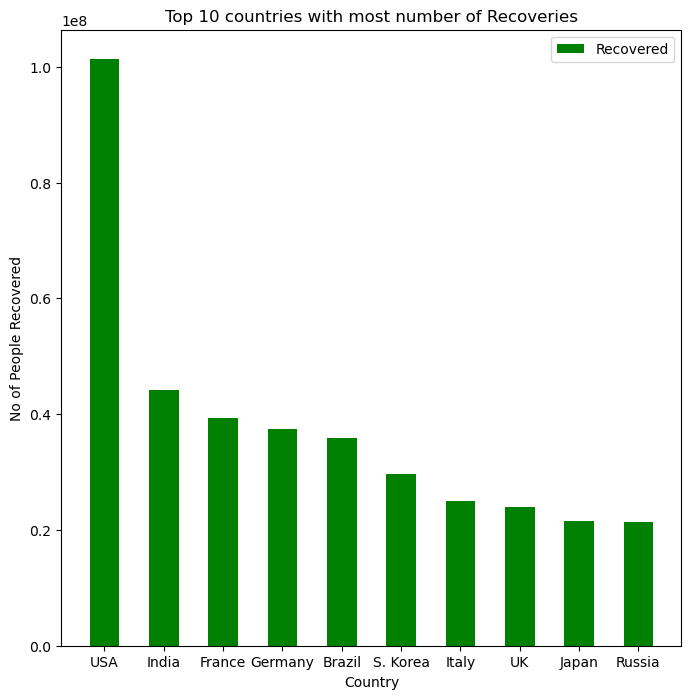

In [76]:
plt.figure(figsize=(8,8))#width and height of the plot
plt.bar(most_recoveries['Country'],most_recoveries['Total Recovered'],color='Green',label='Recovered',width=0.5)
plt.legend()
plt.xlabel("Country")
plt.ylabel("No of People Recovered")
plt.title("Top 10 countries with most number of Recoveries")

In [81]:
#Percentage of deaths by each country
data['Death percentage']=(data['Total Deaths']/data['Total Cases']*100)
data[['Country','Death percentage']].sort_values(by='Death percentage',ascending=False).head(10)

,Country,Death percentage
196,Yemen,18.074508
144,Sudan,7.845690
148,Syria,5.507110
170,Somalia,4.982063
34,Peru,4.885085
88,Egypt,4.773245
18,Mexico,4.508505
96,Bosnia and Herzegovina,4.049738
114,Afghanistan,3.779520
205,Liberia,3.646738


In [82]:
highest_death_percentage=data[['Country','Death percentage']].sort_values(by='Death percentage',ascending=False).head(10)
highest_death_percentage.head(10)

,Country,Death percentage
196,Yemen,18.074508
144,Sudan,7.845690
148,Syria,5.507110
170,Somalia,4.982063
34,Peru,4.885085
88,Egypt,4.773245
18,Mexico,4.508505
96,Bosnia and Herzegovina,4.049738
114,Afghanistan,3.779520
205,Liberia,3.646738


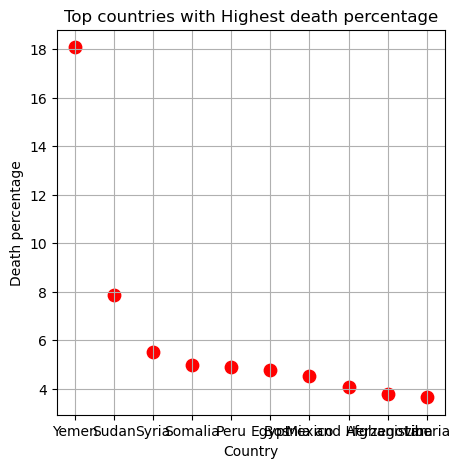

In [85]:
plt.figure(figsize=(5,5))
plt.scatter(highest_death_percentage['Country'],highest_death_percentage['Death percentage'],s=80,c='RED')
plt.ylabel("Death percentage")
plt.xlabel('Country')
plt.title("Top countries with Highest death percentage")
#plt.xticks(rotation=90)
plt.grid()